# PA 2: Classification - Decision Tree

## --> Student Details [3 Points]

Notes: When submitting, fill your name and ID in this cell.  [1 point]
 Name :Krishna kumar Balasubramanian
 ID   : 1001949939
 Name : Mohanraj Senabady
 ID   : 1001964323
 Name : Pooja Srinivasan 
 ID   : 1001952061

## --> Dataset information
Load dataset_DT.csv<br>
The data is ordered by date (day, month)<br>
### Features:
* age           --> age
* job           --> type of Job
* marital       --> marital status 
* education     --> highest education finished  
* default       --> already has credit in default? 
* balance       --> account balance 
* housing       --> taken housing loan?
* loan          --> taken personal loan?
* contact       --> communication via...
* day           --> day of last contact  
* month         --> month of last contact 
* duration      --> duration of last contact 
* campaign      --> number of contacts made to the client during the campaign 
* pdays         --> number of days that passed by after the client was last contacted from a previous campaign (999 means client wasn't previously contacted) 
* previous      --> number of contacts performed before this campaign and for this client
* poutcome      --> outcome of the previous marketing campaign
### Target variable:
* y --> has the client subscribed a term deposit?


## --> Programming Assignment Details

1) For this assignment use Jupyter notebook

2) You can use libraries: Numpy, Pandas, Scikit-learn, Matplotlib and Seaborn

3) Make sure to write about 2-3 lines to explain any kind of visualization

4) Do not to forget to cite any external sources used by you.

#### <b>Note: Please consult the TA before using libraries other than the ones mentioned above</b>

### Hints - 

1) Apart from null values, the dataset consists of "unknown" (string) values in multiple columns. You need to handle them as a part of null values.

1) To compress the data, numerous columns might be combined into one feature. There might even be columns with redundant data, i.e., information from a column might also be available from another column. If there are such columns, you can drop them. 

2) Categorized Data is preferable for decision trees.  If needed, figure out how to convert continuous feature to categorical and implement it.

3) Unwanted data can reduce the model's accuracy.

## Tasks

* Import the libraries and load the dataset (from the csv file) [5 points]

* Pre-process the dataset and provide a detailed explanation.  [25 points]

* Perform 2 visualizations of the features with respect to target variable with detailed explanation. [15 points]

* Determine Six most influential attributes on target attribute (with explanation). You do not necessarily need to drop the remaining features for the Decision Tree Classifier. Your task is just to determine and show the <b><i>Six</i></b> most influential attributes with detailed explanation. [10 points]

* Split your dataset 75% for training, and 25% for testing the classifier. [2 points]

* Use gini and entropy (play around with max_depth and min_samples_leaf parameters) to measure the quality of a split.  [5 points]

* Use comments to explain your code and variable names. [3 points]

* Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support) for both criteria. [20 points]

* Compare the results of the classifier using gini and entropy [5 points]

* Print the decision tree visualization with depth of 5 [5 points]

## <i>Note:</i>
#### There is no separate report for Decision Tree. Hence, you are required to explain your work for all the aforementioned tasks in the markdown cells in Jupyter notebook and through comments.

## Programming Assignment Submission Instructions [2 Points]

### Each file should be submitted separately, do not compress them

For Decision Tree:
1.	'yourLastName_Last4digitsofyourID_DT.ipynb' (Report/Explanation in markdown cells and code in code cells of Notebook preferred)

# Begin your code from here

In [80]:
# Begin here

# Task 1:  Import the libraries and load the dataset (from the csv file)
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree

In [81]:
# 1.1) Using the read_csv() from pandas to read the given csv file and convert it into a dataframe.
df_data = pd.read_csv('dataset_DT.csv')
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18423 entries, 0 to 18422
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        18423 non-null  float64
 1   job        18423 non-null  object 
 2   marital    18423 non-null  object 
 3   education  18103 non-null  object 
 4   default    18423 non-null  object 
 5   balance    18423 non-null  float64
 6   housing    18423 non-null  object 
 7   loan       18423 non-null  object 
 8   contact    18423 non-null  object 
 9   day        18117 non-null  float64
 10  month      18109 non-null  object 
 11  duration   18423 non-null  float64
 12  campaign   18423 non-null  float64
 13  pdays      18423 non-null  float64
 14  previous   18423 non-null  float64
 15  poutcome   18423 non-null  object 
 16  y          18423 non-null  object 
dtypes: float64(7), object(10)
memory usage: 2.4+ MB


In [82]:
# Task 2 : preprocessing the dataset
print("for data preprocessing we use the below following steps:\n1)Finding the null values since null values can not be processed by the program which results in inaccurate learning\n2)Next we find the missing values and replace with nan so it adds up to the null values\n3)We use the drop NA fucntion to drop the null values from the dataset.\n4)we handle the categorical data and replacing it with integers ")

for data preprocessing we use the below following steps:
1)Finding the null values since null values can not be processed by the program which results in inaccurate learning
2)Next we find the missing values and replace with nan so it adds up to the null values
3)We use the drop NA fucntion to drop the null values from the dataset.
4)we handle the categorical data and replacing it with integers 


In [83]:
# 2.1) Finding the null values
# for finding the null values we use the isnull() and sum() to return the count of null values in every column
df_data.isnull().sum()

age            0
job            0
marital        0
education    320
default        0
balance        0
housing        0
loan           0
contact        0
day          306
month        314
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [84]:
# 2.2) Replacing the unkown and missing values with nan
# for this we use the replace function and select the unknown and missing values and replace it with nan.
df_data.replace(['unknown'],np.nan, inplace=True)
df_data.replace(" ", np.nan, inplace=True)

In [85]:
# 2.3) Dropping the null values and creating a new dataframe inorder to not disturb the original dataframe.
# for this we use the dropna() and store it in new dataframe
df_dt = df_data.dropna(inplace = False)
df_dt.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [86]:
# printing the head values of the new dataframe
df_dt.head()

age         job   marital  education default  balance housing loan  \
1  49.0  management  divorced   tertiary      no  20727.0      no   no   
2  32.0    services    single   tertiary      no   1743.0     yes   no   
5  54.0     retired   married  secondary      no   1004.0     yes   no   
6  32.0  technician    single   tertiary      no    392.0     yes   no   
7  37.0  management   married  secondary      no   1180.0     yes  yes   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
1  cellular  1.0   apr     285.0       3.0  132.0       2.0  failure  no  
2  cellular  1.0   apr    1156.0       1.0  261.0       3.0    other  no  
5  cellular  1.0   apr     479.0       1.0  307.0       1.0  failure  no  
6  cellular  1.0   apr     957.0       2.0  131.0       2.0  failure  no  
7  cellular  1.0   apr     786.0       1.0  135.0       1.0    other  no

In [111]:
# 2.4) handeling the catergorical data ie. changing all the catergorical data into numeric values
# for this we use the preprocessing library from scikit learn and fit the dataframe into it to encode all the categorical data
le = preprocessing.LabelEncoder()
df_dt = df_dt.apply(le.fit_transform)
df_dt.describe()

age         job      marital    education      default  \
count  4650.000000  4650.00000  4650.000000  4650.000000  4650.000000   
mean     22.388172     4.46000     1.205806     1.248172     0.003656   
std      12.106756     3.19163     0.620168     0.654190     0.060360   
min       0.000000     0.00000     0.000000     0.000000     0.000000   
25%      13.000000     1.00000     1.000000     1.000000     0.000000   
50%      19.000000     4.00000     1.000000     1.000000     0.000000   
75%      30.000000     7.00000     2.000000     2.000000     0.000000   
max      67.000000    10.00000     2.000000     2.000000     1.000000   

           balance      housing         loan      contact          day  \
count  4650.000000  4650.000000  4650.000000  4650.000000  4650.000000   
mean    920.921505     0.542151     0.120430     0.072688    13.461505   
std     660.976386     0.498274     0.325499     0.259652     7.979022   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     331.000000     0.000000     0.000000     0.000000     7.000000   
50%     800.500000     1.000000     0.000000     0.000000    13.000000   
75%    1457.750000     1.000000     0.000000     0.000000    19.000000   
max    2303.000000     1.000000     1.000000     1.000000    30.000000   

             month     duration     campaign        pdays     previous  \
count  4650.000000  4650.000000  4650.000000  4650.000000  4650.000000   
mean      5.723011   286.664731     0.893548   188.728817     2.096774   
std       3.559507   200.083681     1.315093   105.730068     3.058843   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       3.000000   138.250000     0.000000    91.000000     0.000000   
50%       8.000000   228.000000     0.000000   167.000000     1.000000   
75%       9.000000   383.000000     1.000000   272.000000     3.000000   
max      11.000000   917.000000    13.000000   501.000000    32.000000   

          poutcome            y  
count  4650.000000  4650.000000  
mean      0.715484     0.363011  
std       0.850719     0.480920  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       2.000000     1.000000  
max       2.000000     1.000000

In [88]:
# Task 3: Perform 2 visualizations of the features with respect to target variable with detailed explanation.
print("To view the Target variable with repect to other features we use multivariable plotting using seaborn library,\nthrough which we plot the pair and box plots.")

To view the Target variable with repect to other features we use multivariable plotting using seaborn library,
through which we plot the pair and box plots.


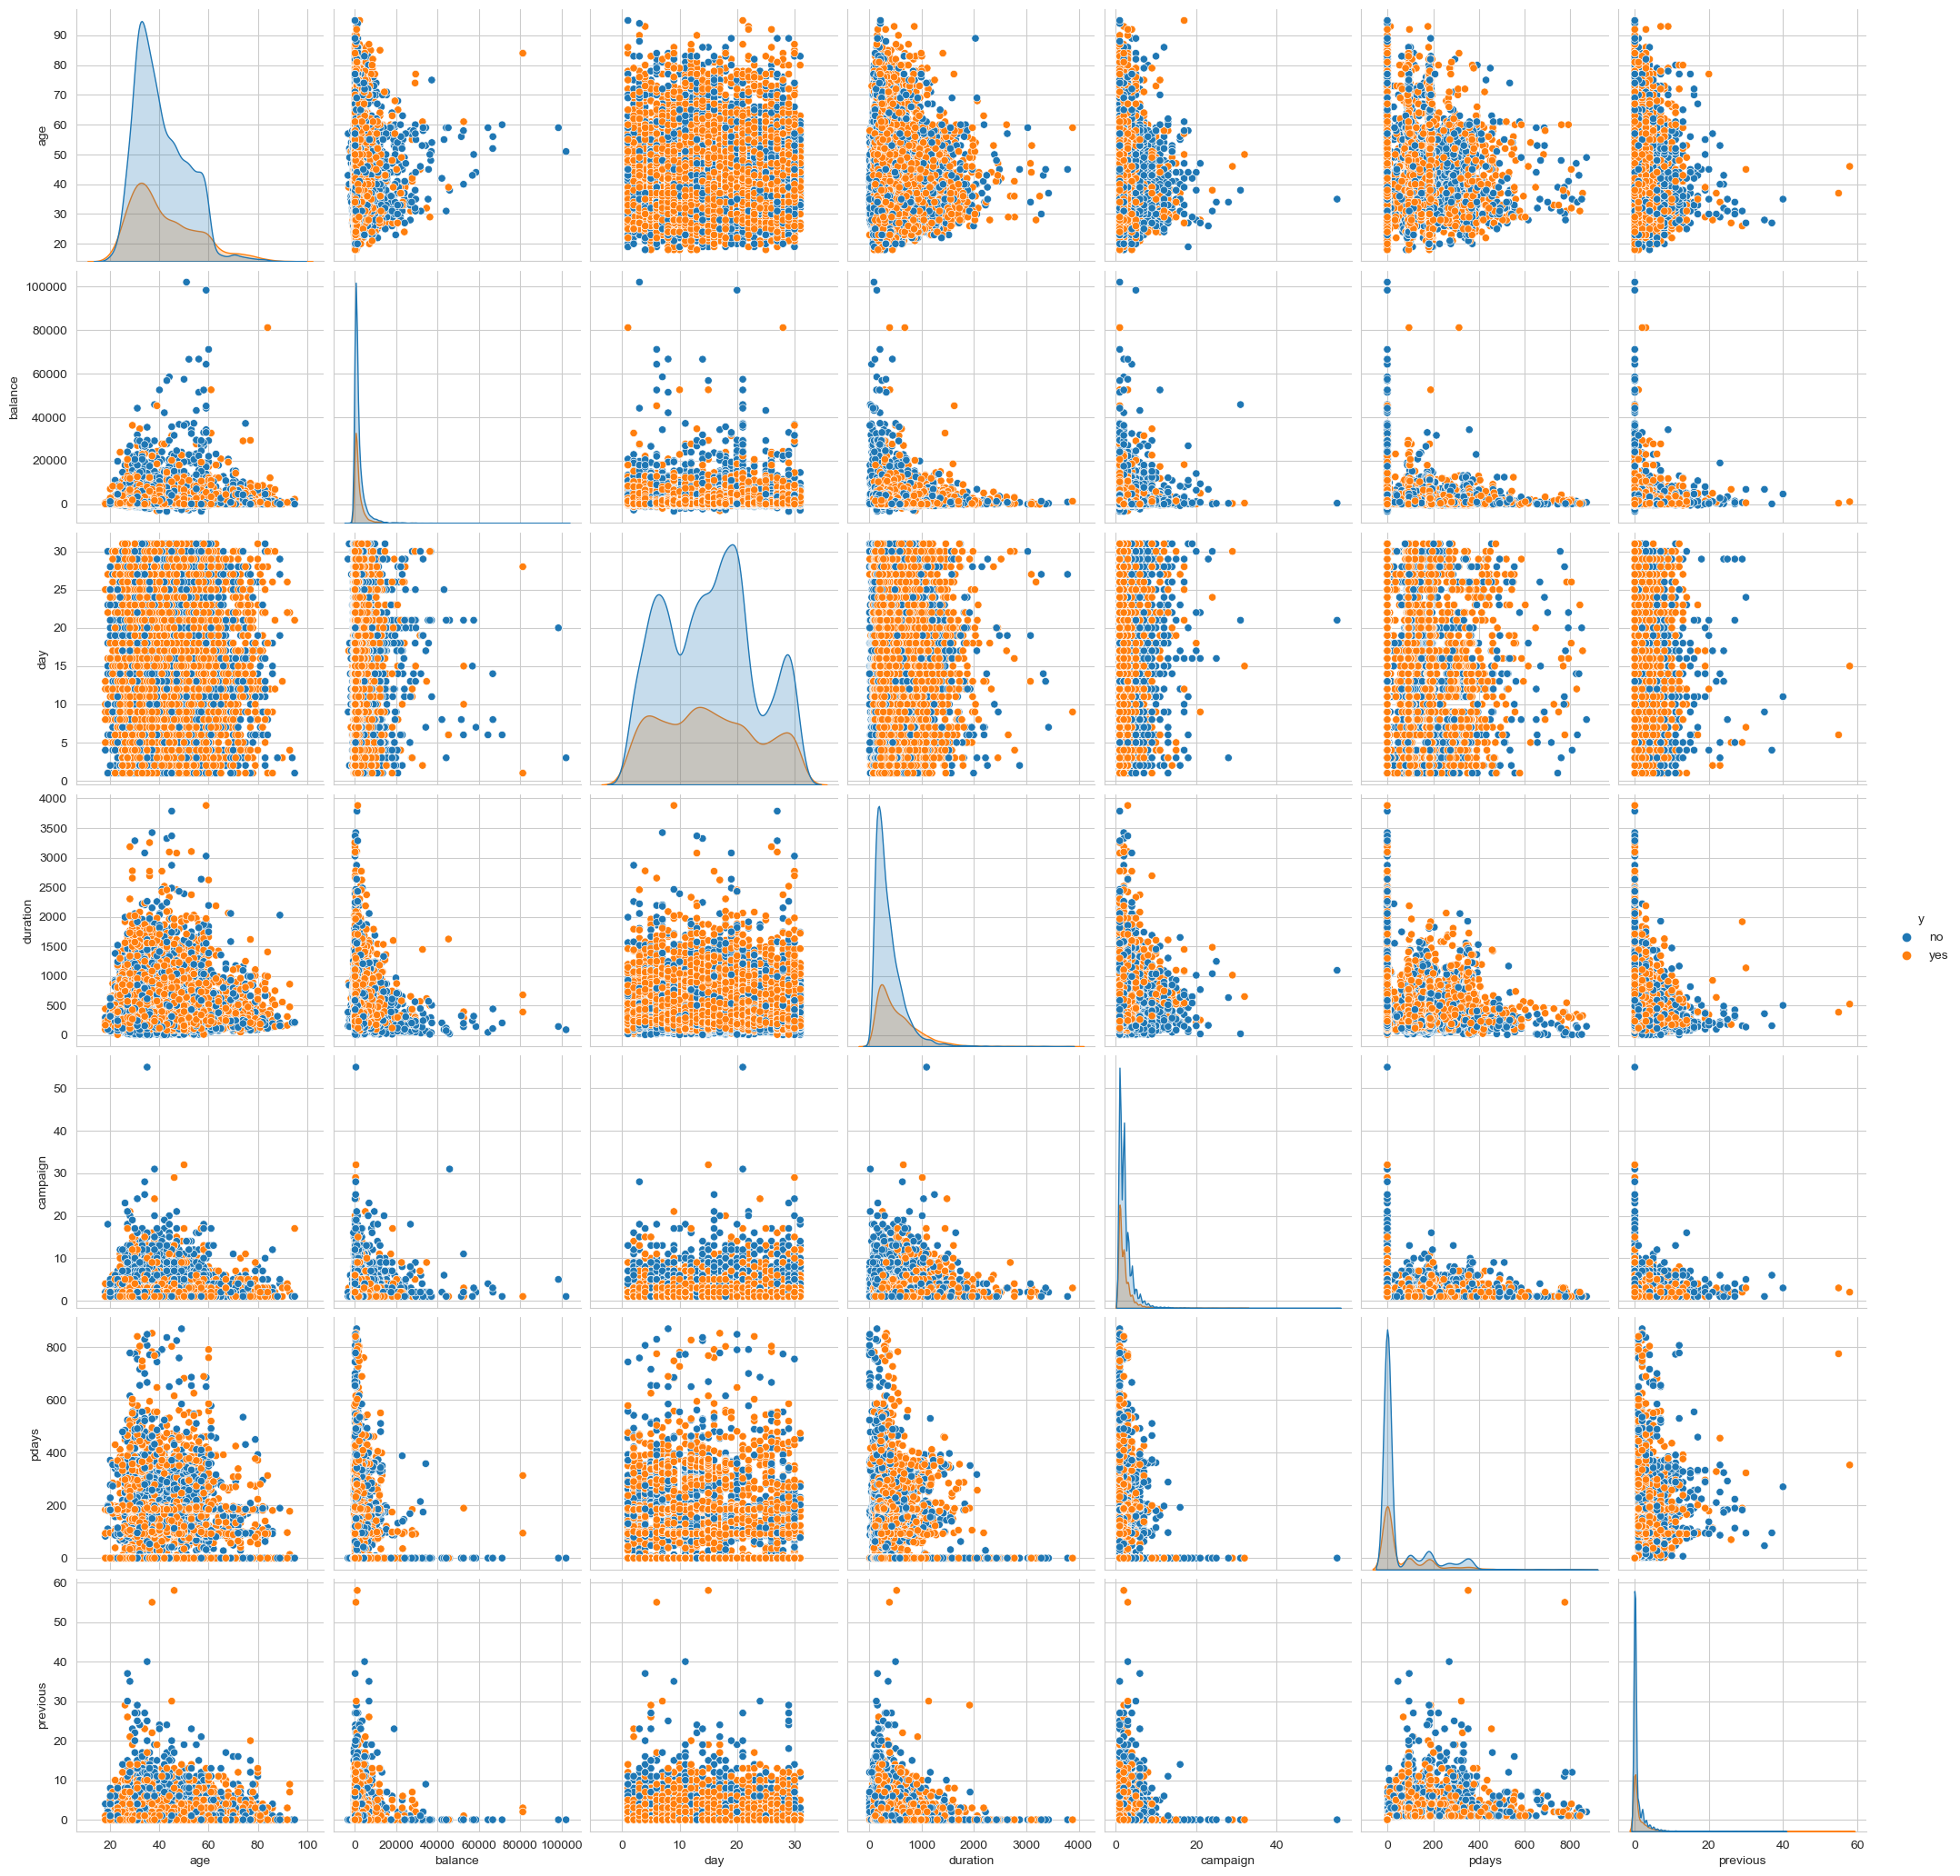

In [110]:
# 3.1) Using the seaborn library to plot the pairplot between all the features with respect to the target feature.
sns.set_style("whitegrid");
sns.pairplot(df_data, hue="y", height=3);
plt.show()

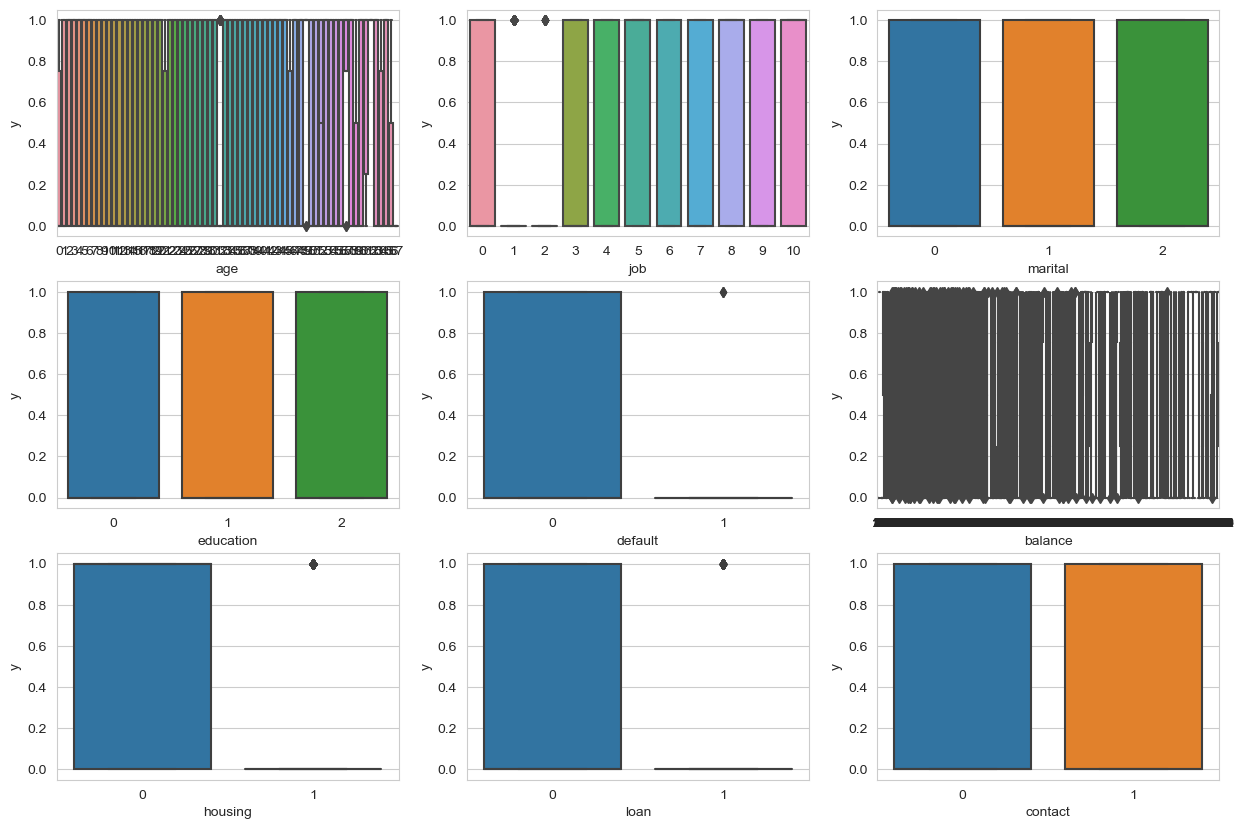

In [90]:
# 3.2) Using the seaborn library to plot the boxplot between all the features with respect to the target feature.
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for var, subplot in zip(df_dt, ax.flatten()):
    sns.boxplot(x=var, y='y', data=df_dt, ax=subplot)
    
plt.show();

In [91]:
# Task 4: Determine Six most influential attributes on target attribute. 
print("To find the most important features with respect to the target feature 'y' we use f_classif library from the\nsklearn feature selection library to calculate the f-scores of every feature with respect to target feature.")

To find the most important features with respect to the target feature 'y' we use f_classif library from the
sklearn feature selection library to calculate the f-scores of every feature with respect to target feature.


In [92]:
# 4.1) using the f_classif library
# On finding the f scores of every feature we can find the top 6 features with highest f-scores which are closely related to the target variabel.

X_data = df_dt.loc[:,df_dt.columns != 'y']   # Taking all the data except y column since y is the target column
y_data = df_dt.loc[:,'y'] 
# Create f_classif object to calculate F-value
f_value = f_classif(X_data, y_data)

# Print the name and F-value of each feature
for feature in zip(df_dt, f_value[0]):
    print(feature)


('age', 14.370425178482801)
('job', 23.16555371572637)
('marital', 16.55289617993311)
('education', 48.797866397942514)
('default', 2.5679451010339633)
('balance', 4.877576953767906)
('housing', 438.658576677753)
('loan', 75.96536459229345)
('contact', 0.30437287386254025)
('day', 2.408433579605875)
('month', 0.14495262467007491)
('duration', 258.5872147958948)
('campaign', 14.7387446156525)
('pdays', 47.24352554530514)
('previous', 6.503845351348268)
('poutcome', 996.7557475690685)


In [113]:
# 4.2) we use the SelectKBest library to get the best features with respect to p-value and f-score
bestfeatures = SelectKBest(score_func=f_classif, k=10)
data_trim = bestfeatures.fit_transform(X_data, y_data)

print('bestfeatures fscore\n',bestfeatures.scores_)
print('bestfeatures pvalues\n',bestfeatures.pvalues_)
print(data_trim.shape)

bestfeatures fscore
 [1.43704252e+01 2.31655537e+01 1.65528962e+01 4.87978664e+01
 2.56794510e+00 4.87757695e+00 4.38658577e+02 7.59653646e+01
 3.04372874e-01 2.40843358e+00 1.44952625e-01 2.58587215e+02
 1.47387446e+01 4.72435255e+01 6.50384535e+00 9.96755748e+02]
bestfeatures pvalues
 [1.52044911e-004 1.53348881e-006 4.80961054e-005 3.23905662e-012
 1.09117253e-001 2.72564127e-002 3.77206421e-093 3.95613330e-018
 5.81180442e-001 1.20751154e-001 7.03423644e-001 1.14962808e-056
 1.25124260e-004 7.09870567e-012 1.07959456e-002 2.22587061e-198]
(4650, 10)


In [94]:
# Task 5: splitting the dataset into test and training set
# we use the train test split library from sk learn to split the dataset into training (75%) and test data(25%)
X = df_dt.loc[:,df_dt.columns != 'y']   # Taking all the data except y column since y is the target column
y = df_dt.loc[:,'y'] 

# splitting training and testing the dataset:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=25)           #Splitting data into 75% of training and 25% of testing

In [95]:
# Task 6: Use gini and entropy (play around with max_depth and min_samples_leaf parameters) to measure
#the quality of a split. [5 points]

In [96]:
# 6.1) obtaining the acc score with max depth. We take a list where the max depth values ranges from 4 to 7 
# and applying the gini index.


md = list(range(4, 7))

#accuracy scores for different ds are printed.
for depth in md: 
    gini = DecisionTreeClassifier(max_depth = depth)         #Applying Gini to measure the quality of the split
    gini.fit(X_train, y_train)
    max_gini = gini.predict(X_test)
    print("acc score of Gini for d ",depth,"=",accuracy_score(y_test,max_gini))  # printing accuracy score

acc score of Gini for d  4 = 0.7343078245915735
acc score of Gini for d  5 = 0.7368873602751504
acc score of Gini for d  6 = 0.7420464316423044


In [97]:
# 6.2) obtaining the acc score with min samples. We take a list where the max depth values ranges from 4 to 7 
# and applying the gini index.


md = list(range(4, 7))

#accuracy scores for different ds are printed.
for depth in md: 
    gini = DecisionTreeClassifier(min_samples_split=depth) 
    gini.fit(X_train, y_train)
    min_s_gini = gini.predict(X_test)
    print("acc score of Gini for d ",depth,"=",accuracy_score(y_test,min_s_gini))  # printing accuracy score

acc score of Gini for d  4 = 0.6801375752364575
acc score of Gini for d  5 = 0.6861564918314703
acc score of Gini for d  6 = 0.6895958727429062


In [98]:
# 6.3) obtaining the acc score with max_depth. We take a list where the max depth values ranges from 4 to 7 
# and applying the entropy.

md = list(range(4, 7))

#accuracy scores for different ds are printed.
for depth in md: 
    entropy = DecisionTreeClassifier(max_depth = depth,random_state = 0,criterion = "entropy")    #Applying Entropy to measure quality
    entropy.fit(X_train, y_train)
    max_ent = entropy.predict(X_test)
    print("acc score of Entropy for d ",depth,"=",accuracy_score(y_test,max_ent)) # printing acc score

acc score of Entropy for d  4 = 0.7300085984522786
acc score of Entropy for d  5 = 0.7300085984522786
acc score of Entropy for d  6 = 0.7351676698194325


In [99]:
# 6.4) obtaining the acc score with min samples. We take a list where the max depth values ranges from 4 to 7 
# and applying the entropy.

md = list(range(4, 7))

#accuracy scores for different ds are printed.
for depth in md: 
    entropy = DecisionTreeClassifier(min_samples_split=depth, random_state=21,criterion = "entropy")    #Applying Entropy to measure quality
    entropy.fit(X_train, y_train)
    mins_s_ent = entropy.predict(X_test)
    print("acc score of Entropy for d ",depth,"=",accuracy_score(y_test,mins_s_ent)) # printing acc score

acc score of Entropy for d  4 = 0.6913155631986242
acc score of Entropy for d  5 = 0.6921754084264833
acc score of Entropy for d  6 = 0.6913155631986242


In [100]:
# Task 8 : Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the
# classification Report (includes: precision, recall, f1-score, and support) for both criteria. 

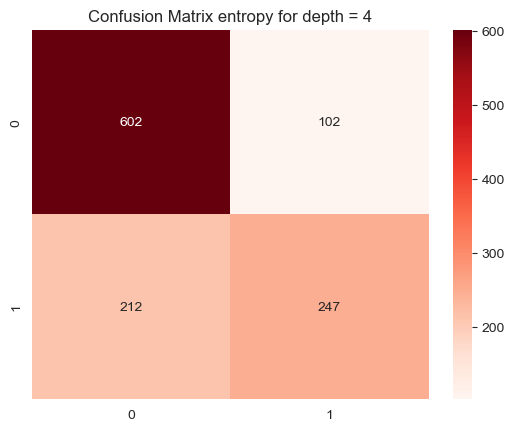

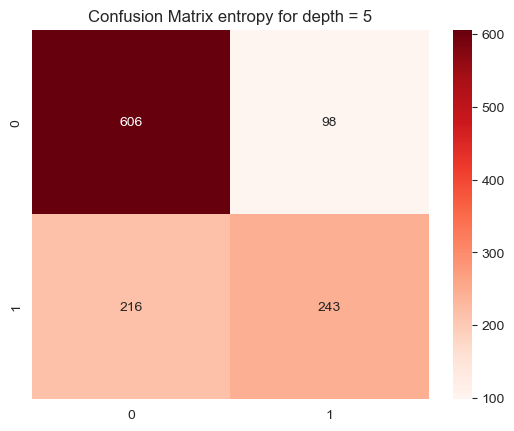

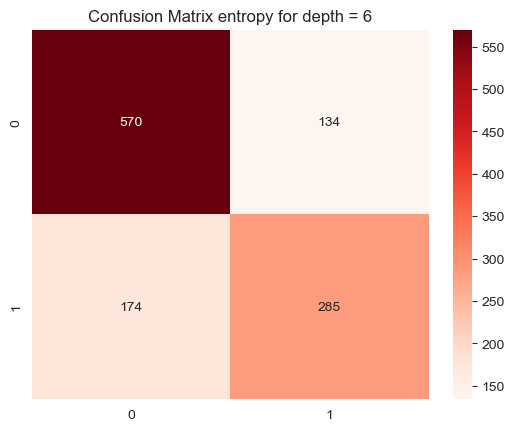

In [121]:
# 8.1) Confusion Matrix using Entropy

md = list(range(4, 7))
#confusion matric for different ds are calculated(entropy).
confusion_mat = []
for depth in md: 
    gini = DecisionTreeClassifier(max_depth = depth,random_state = 0,criterion='entropy')
    gini.fit(X_train, y_train)
    max_gini = gini.predict(X_test)
    confusion_mat = confusion_matrix(y_test,max_gini)


    cf_labels = ["True Negative","False Positive","False Negative","True Positive"]

    cf_format = ['{0:0.0f}'.format(value) for value in
                    confusion_mat.flatten()]
    cf_percent = ['{0:.2%}'.format(value) for value in
                         confusion_mat.flatten()/np.sum(confusion_mat)]
    cf_combine = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
              zip(cf_labels,cf_format,cf_percent)]
    cf_combine = np.asarray(cf_combine).reshape(2,2)
    plt.title("Confusion Matrix entropy for depth = "+str(depth))
    sns.heatmap(confusion_mat, annot=True, fmt='' ,cmap='Reds')
    plt.show()

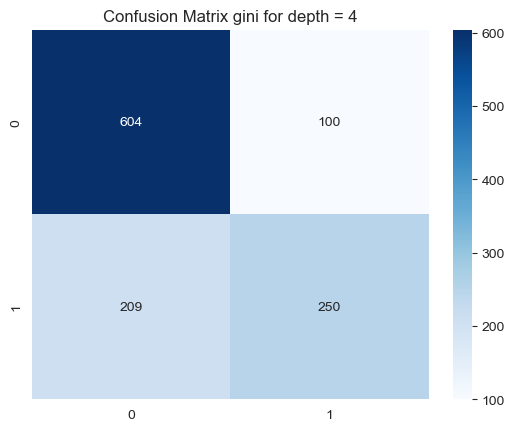

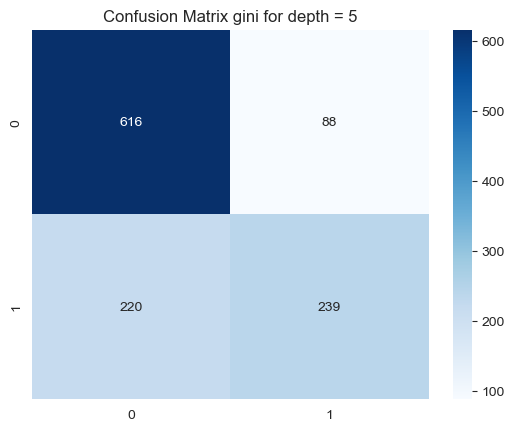

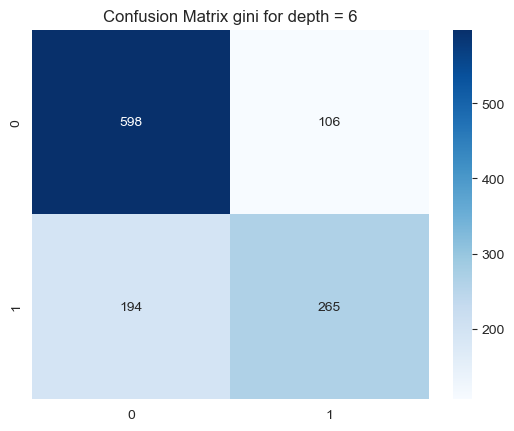

In [119]:
# 8.2) Confusion Matrix using gini 

md = list(range(4, 7))
#confusion matric for different ds are calculated(gini).
confusion_mat = []
for depth in md: 
    gini = DecisionTreeClassifier(max_depth = depth,random_state = 0,criterion='gini')
    gini.fit(X_train, y_train)
    max_gini = gini.predict(X_test)
    confusion_mat = confusion_matrix(y_test,max_gini)


    cf_labels = ["True Negative","False Positive","False Negative","True Positive"]

    cf_format = ['{0:0.0f}'.format(value) for value in
                    confusion_mat.flatten()]
    cf_percent = ['{0:.2%}'.format(value) for value in
                         confusion_mat.flatten()/np.sum(confusion_mat)]
    cf_combine = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
              zip(cf_labels,cf_format,cf_percent)]
    cf_combine = np.asarray(cf_combine).reshape(2,2)
    plt.title("Confusion Matrix gini for depth = "+str(depth))
    sns.heatmap(confusion_mat, annot=True, fmt='' ,cmap='Blues')
    plt.show()

In [103]:
# 8.3) Classification Report for differnet d's using entropy

md = list(range(4, 7))

for depth in md: 
    entropy = DecisionTreeClassifier(max_depth = depth,random_state = 0,criterion='entropy')
    entropy.fit(X_train, y_train)
    max_ent = entropy.predict(X_test)
    print("Classification Report for d ",depth)
    print(classification_report(y_test,max_ent))

Classification Report for d  4
              precision    recall  f1-score   support

           0       0.74      0.86      0.79       704
           1       0.71      0.54      0.61       459

    accuracy                           0.73      1163
   macro avg       0.72      0.70      0.70      1163
weighted avg       0.73      0.73      0.72      1163

Classification Report for d  5
              precision    recall  f1-score   support

           0       0.74      0.86      0.79       704
           1       0.71      0.53      0.61       459

    accuracy                           0.73      1163
   macro avg       0.72      0.70      0.70      1163
weighted avg       0.73      0.73      0.72      1163

Classification Report for d  6
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       704
           1       0.68      0.62      0.65       459

    accuracy                           0.74      1163
   macro avg       0.72      0.72  

In [104]:
# 8.4) Classification Report for differnet d's using gini

md = list(range(4, 7))

for depth in md: 
    gini = DecisionTreeClassifier(max_depth = depth,random_state = 0,criterion='gini')
    gini.fit(X_train, y_train)
    max_gini = gini.predict(X_test)
    print("Classification Report for d ",depth)
    print(classification_report(y_test,max_gini))

Classification Report for d  4
              precision    recall  f1-score   support

           0       0.74      0.86      0.80       704
           1       0.71      0.54      0.62       459

    accuracy                           0.73      1163
   macro avg       0.73      0.70      0.71      1163
weighted avg       0.73      0.73      0.73      1163

Classification Report for d  5
              precision    recall  f1-score   support

           0       0.74      0.88      0.80       704
           1       0.73      0.52      0.61       459

    accuracy                           0.74      1163
   macro avg       0.73      0.70      0.70      1163
weighted avg       0.73      0.74      0.72      1163

Classification Report for d  6
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       704
           1       0.71      0.58      0.64       459

    accuracy                           0.74      1163
   macro avg       0.73      0.71  

In [122]:
#Task 9 : Compare the results of the classifier using gini and entropy.

print("On comparing the acc scores of gini and entropy we find that gini acc score is becoming better as the depth increases when compared with entropy. Gini computes faster than entropy and the difference in accuracy is not significant, Hence, gini is better than entropy.")

On comparing the acc scores of gini and entropy we find that gini acc score is becoming better as the depth increases when compared with entropy. Gini computes faster than entropy and the difference in accuracy is not significant, Hence, gini is better than entropy.


In [106]:
#Task 10: Print the decision tree visualization with depth of 5.

# 10.1) Using Gini 

gini = DecisionTreeClassifier(max_depth = 5,random_state = 0,criterion='gini')
gini.fit(X_train, y_train)
    
fig, axes = plt.subplots(nrows = 1,ncols =1 , figsize=(130,130))
  
tree.plot_tree(gini,filled = True);
plt.show();


In [107]:
# 10.2) Using Entropy
entropy = DecisionTreeClassifier(max_depth = 5,random_state = 0,criterion='entropy')
entropy.fit(X_train, y_train)
   
fig, axes = plt.subplots(nrows = 1,ncols =1 , figsize=(130,130))
   
tree.plot_tree(entropy, filled = True);
plt.show();


#Task 11: Include a paragraph describing the contribution made by each team member.
Krishna Kumar Balasubramanian:
* Import the libraries and load the dataset (from the csv file)

* Pre-process the dataset and provide a detailed explanation.

* Perform 2 visualizations of the features with respect to target variable with detailed explanation.

* Determine Six most influential attributes on target attribute (with explanation). You do not necessarily need to drop the remaining features for the Decision Tree Classifier. Your task is just to determine and show the <b><i>Six</i></b> most influential attributes with detailed explanation.

Pooja Srinivasan:
* Split your dataset 75% for training, and 25% for testing the classifier.

* Use gini and entropy (play around with max_depth and min_samples_leaf parameters) to measure the quality of a split.

* Use comments to explain your code and variable names.

Mohan Senabady:

* Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support) for both criteria.

* Compare the results of the classifier using gini and entropy.

* Print the decision tree visualization with depth of 5.



# reference
#https://builtin.com/machine-learning/how-to-preprocess-data-python
#https://www.kaggle.com/code/shirantha/bank-marketing-data-a-decision-tree-approach